In [182]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import blend_modes as blm
import random
from PIL import Image


In [4]:
# mpl.rcParams['axes.spines.left'] = False
# mpl.rcParams['axes.spines.right'] = False
# mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.bottom'] = False

In [2]:
def show(image):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    

Chèn box bên ngoài công thức
<img src="http://minio.dev.ftech.ai/scio-1409-dataset-fail-d5c7fdbf/part4.1_1606.jpg">

In [60]:
def addbox(image_path, formula, color_box = "black"):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    height, width, c = image.shape
    blank_image = np.zeros((height + 10 , width + 10, 3), np.uint8) +255
    blank_image[5:5+height,5:5+width,:] = image
    height_, width_, c = blank_image.shape
    start_point = (2,2)
    end_point = (width_-3, height_-5)
    if color_box == "red":
        color = (255, 0, 0)
    elif color_box == "blue":
        color = (0, 0, 255)
    elif color_box == "black":
        color = (0, 0, 0)

    thickness = 1
    blank_image_dr = cv2.rectangle(blank_image.copy(), start_point, end_point, color, thickness)
    formula = r"\boxed{ " + formula + r" }"
    return blank_image_dr, formula


\boxed{ buoi cong tu }


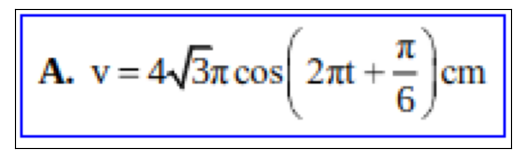

In [67]:
blank_image, formula = addbox("DataTest\Data08_11-19-19.png", "buoi cong tu","blue")
show(blank_image)
print(formula)
# DataTest\Data08_11-19-19.png

Chèn một phần box vào ảnh và giữ nguyên công thức\
<img src="http://minio.dev.ftech.ai/scio-1409-dataset-fail-d5c7fdbf/part4.1_15823.jpg" style="width:100px;height:40px;">

In [179]:
def addpartbox(image_path, formula, color_box = "black"):
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    height, width, c = image.shape
    x_start, y_start = random.randint(-10,-1), random.randint(-10,0)
    x_end, y_end = width + random.randint(-width//1.5, -width//4), height + random.randint(-height//1.5,-height//4)
    start_point = (x_start, x_start)
    end_point = (x_end, y_end)
    if color_box == "red":
        color = (255, 0, 0)
    elif color_box == "blue":
        color = (0, 0, 255)
    elif color_box == "black":
        color = (0, 0, 0)

    thickness = 1
    image = cv2.rectangle(image.copy(), start_point, end_point, color, thickness)
    return image, formula


buoi cong tu


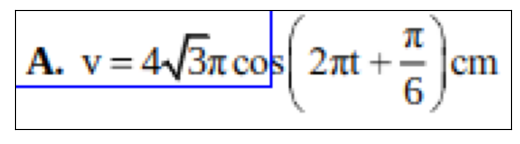

In [180]:
blank_image, formula = addpartbox("DataTest\Data08_11-19-19.png", "buoi cong tu","blue")
# DataTest\Data08_11-19-19.png
show(blank_image)
print(formula)

Add màu vào công thức \
<img src="http://minio.dev.ftech.ai/scio-1409-dataset-fail-d5c7fdbf/part4.1_6219.jpg" style="width:200px;height:80px;">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


buoi cong tu


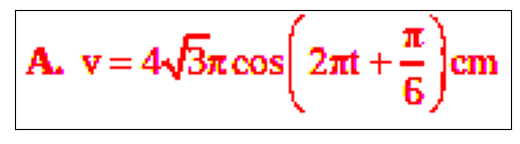

In [255]:
def addcolor(image_path, formula, color ="red"):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGBA)
    ret,image = cv2.threshold(image,200,255,cv2.THRESH_BINARY)
    width, height = image.shape[1], image.shape[0]
    if color == "red":
      background = Image.new('RGBA', (width, height), color = 'red')
    else:
      background = Image.new('RGBA', (width, height), color = 'blue')

    blend_image = blm.addition(np.array(image).astype(float), np.array(background).astype(float),0.5)
    # blend_image = np.array(image)
    blended_img = np.uint8(blend_image) 
    blended_img_raw = Image.fromarray(blended_img)
    blended_img_raw.convert('RGB')
    return blend_image, formula

# color_image, formula = addcolor("DataTest\\fm_cau482.png", "buoi cong tu","red")
color_image, formula = addcolor("DataTest\Data08_11-19-19.png", "buoi cong tu","red")
# DataTest\Data08_11-19-19.png 
# DataTest\\fm_cau482.png
show(color_image)
print(formula)
